In [6]:
import pandas as pd
import numpy as np
import statistics as st
df=pd.read_csv("CarPrice_Assignment.csv")
df.head()
#impoting necessary libraries.

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.shape

(205, 26)

In [8]:
df.duplicated().sum()# no duplicate found

0

In [9]:
df.isnull().sum()# no null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.describe() # some ouliers found by taking difference between mean and median

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
data= df.select_dtypes(include="number")# selecting only numerical values
data

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
data.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [14]:
import seaborn as sns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12068\1803675587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["compressionratio"])


<Axes: xlabel='compressionratio', ylabel='Density'>

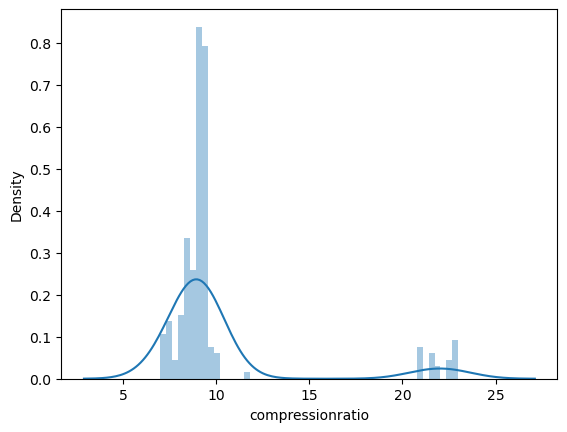

In [15]:
sns.distplot(data["compressionratio"])# found data is positively skewed

In [16]:
data.kurt()

car_ID             -1.200000
symboling          -0.676271
wheelbase           1.017039
carlength          -0.082895
carwidth            0.702764
carheight          -0.443812
curbweight         -0.042854
enginesize          5.305682
boreratio          -0.785042
stroke              2.174396
compressionratio    5.233054
horsepower          2.684006
peakrpm             0.086756
citympg             0.578648
highwaympg          0.440070
price               3.051648
dtype: float64

<Axes: ylabel='compressionratio'>

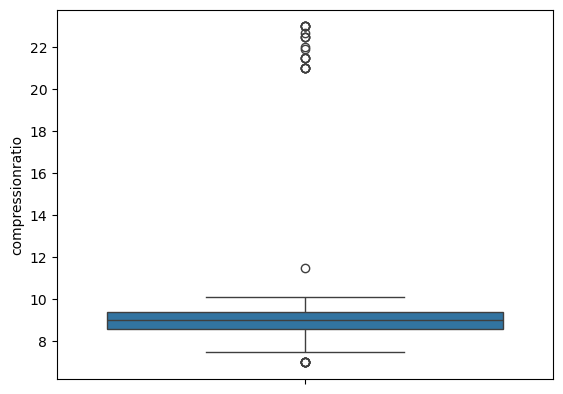

In [17]:
sns.boxplot(data['compressionratio'])

In [18]:
q1= data.compressionratio.quantile(0.25)

q1
# using iqr method to deal with outliers

8.6

In [19]:
q3=data.compressionratio.quantile(0.75)
q3

9.4

In [20]:
iqr=q3-q1
iqr

0.8000000000000007

In [21]:
lw=q1-1.5*iqr
lw

7.399999999999999

In [22]:
uw=q3+1.5*iqr
uw

10.600000000000001

In [23]:
df1=data[(data.compressionratio<lw)|(data.compressionratio>uw)]
df1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167
29,30,3,95.9,173.2,66.3,50.2,2811,156,3.60,3.90,7.0,145,5000,19,24,12964.000
49,50,0,102.0,191.7,70.6,47.8,3950,326,3.54,2.76,11.5,262,5000,13,17,36000.000
63,64,0,98.8,177.8,66.5,55.5,2443,122,3.39,3.39,22.7,64,4650,36,42,10795.000
66,67,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,72,4200,31,39,18344.000
67,68,-1,110.0,190.9,70.3,56.5,3515,183,3.58,3.64,21.5,123,4350,22,25,25552.000
68,69,-1,110.0,190.9,70.3,58.7,3750,183,3.58,3.64,21.5,123,4350,22,25,28248.000
69,70,0,106.7,187.5,70.3,54.9,3495,183,3.58,3.64,21.5,123,4350,22,25,28176.000
70,71,-1,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123,4350,22,25,31600.000
82,83,3,95.9,173.2,66.3,50.2,2833,156,3.58,3.86,7.0,145,5000,19,24,12629.000


In [24]:
q1= data.compressionratio.quantile(0.25)
q3=data.compressionratio.quantile(0.75)
iqr=q3-q1
iqr

0.8000000000000007

In [25]:
lw=q1-1.5*iqr
uw=q3+1.5*iqr
print(lw,uw)


7.399999999999999 10.600000000000001


In [26]:
df2=data[(data.compressionratio>=lw)&(data.compressionratio<=uw)]
df2

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,200,-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0


In [27]:
df2.skew()

car_ID             -0.006686
symboling           0.118733
wheelbase           1.177045
carlength           0.195733
carwidth            1.083902
carheight           0.175698
curbweight          0.792557
enginesize          1.948105
boreratio           0.115669
stroke             -0.754746
compressionratio   -0.803530
horsepower          1.427094
peakrpm             0.147985
citympg             0.685652
highwaympg          0.454692
price               1.967340
dtype: float64

<Axes: ylabel='compressionratio'>

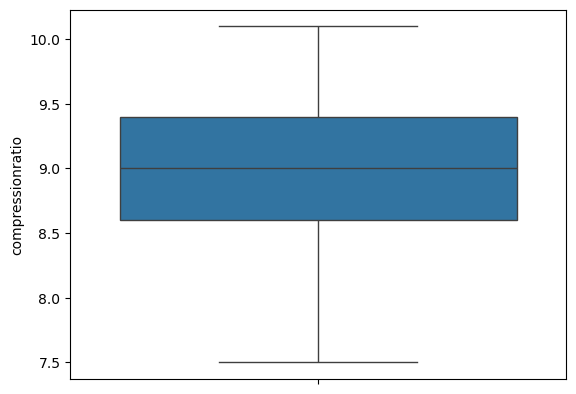

In [28]:
sns.boxplot(df2['compressionratio'])

In [29]:
def remove_outliers(df,columns):
    df_filtered=df.copy()
    for col in columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    df_filtered= df_filtered[(df_filtered[col]>=lw)&(df_filtered[col]<=uw)]
    return df_filtered

In [30]:
dff=remove_outliers(data,['wheelbase','compressionratio','enginesize','horsepower','price'])

In [31]:
dff

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [32]:
dff.skew()

car_ID             -0.063800
symboling           0.160302
wheelbase           0.949269
carlength          -0.048799
carwidth            0.707161
carheight           0.107650
curbweight          0.437676
enginesize          0.682274
boreratio           0.089944
stroke             -1.028921
compressionratio    2.583205
horsepower          0.835251
peakrpm             0.060909
citympg             0.775444
highwaympg          0.728459
price               1.016916
dtype: float64

<Axes: ylabel='price'>

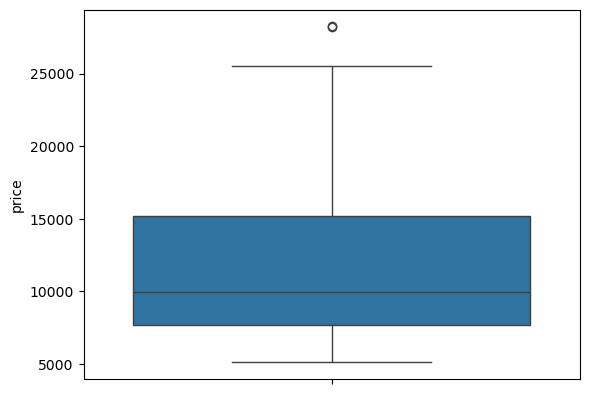

In [33]:
sns.boxplot(dff['price'])

In [34]:
#one hot encoding for independant features
CarPrice_Assignment_encoder=pd.get_dummies(df,columns=['CarName','enginetype','cylindernumber','enginesize','fueltype','fuelsystem','aspiration','doornumber','carbody','drivewheel','enginelocation'],dtype=int)

In [35]:
df3=CarPrice_Assignment_encoder
df3

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,...,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear
0,1,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,...,1,0,0,0,0,0,0,1,1,0
1,2,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,...,1,0,0,0,0,0,0,1,1,0
2,3,1,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,...,0,0,1,0,0,0,0,1,1,0
3,4,2,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,...,0,0,0,1,0,0,1,0,1,0
4,5,2,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,...,0,0,0,1,0,0,0,1,1,0
201,202,-1,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,...,0,0,0,1,0,0,0,1,1,0
202,203,-1,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,...,0,0,0,1,0,0,0,1,1,0
203,204,-1,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,...,0,0,0,1,0,0,0,1,1,0


In [36]:
corr= data.select_dtypes(include=['number']).corr()
corr

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [37]:
df3.drop(columns=['car_ID'])# droping car id as it is found unnecessary

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,...,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear
0,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,...,1,0,0,0,0,0,0,1,1,0
1,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,...,1,0,0,0,0,0,0,1,1,0
2,1,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,...,0,0,1,0,0,0,0,1,1,0
3,2,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,...,0,0,0,1,0,0,1,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,...,0,0,0,1,0,0,0,1,1,0
201,-1,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,...,0,0,0,1,0,0,0,1,1,0
202,-1,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134,...,0,0,0,1,0,0,0,1,1,0
203,-1,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,...,0,0,0,1,0,0,0,1,1,0


In [38]:
from sklearn.preprocessing import StandardScaler# scaling is done to make the values in same range

scaler = StandardScaler()
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

df3[numerical_columns] = scaler.fit_transform(df3[numerical_columns])

df3.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,...,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear
0,1,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,...,1,0,0,0,0,0,0,1,1,0
1,2,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,...,1,0,0,0,0,0,0,1,1,0
2,3,1,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,-2.404880,0.685946,-0.288349,...,0,0,1,0,0,0,0,1,1,0
3,4,2,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.517266,0.462183,-0.035973,...,0,0,0,1,0,0,1,0,1,0
4,5,2,0.107110,0.207256,0.230001,0.235942,0.516807,-0.517266,0.462183,-0.540725,...,0,0,0,1,0,1,0,0,1,0


In [39]:
from sklearn.model_selection import train_test_split # splitting the data into two that is 80% training and 20% for test

X = df3.drop(columns=['price'])
y = df3['price']

X


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,...,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear
0,1,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,...,1,0,0,0,0,0,0,1,1,0
1,2,3,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,...,1,0,0,0,0,0,0,1,1,0
2,3,1,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,-2.404880,0.685946,-0.288349,...,0,0,1,0,0,0,0,1,1,0
3,4,2,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.517266,0.462183,-0.035973,...,0,0,0,1,0,0,1,0,1,0
4,5,2,0.107110,0.207256,0.230001,0.235942,0.516807,-0.517266,0.462183,-0.540725,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,1.721873,1.198549,1.398245,0.728239,0.763241,1.666445,-0.336970,-0.162161,...,0,0,0,1,0,0,0,1,1,0
201,202,-1,1.721873,1.198549,1.351515,0.728239,0.949992,1.666445,-0.336970,-0.364062,...,0,0,0,1,0,0,0,1,1,0
202,203,-1,1.721873,1.198549,1.398245,0.728239,0.878757,0.926204,-1.232021,-0.338824,...,0,0,0,1,0,0,0,1,1,0
203,204,-1,1.721873,1.198549,1.398245,0.728239,1.273437,-1.183483,0.462183,3.244916,...,0,0,0,1,0,0,0,1,1,0


In [89]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((164, 243), (41, 243), (164,), (41,))

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
             
y_pred_lr = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

(lr_mse, lr_mae, lr_r2)

#implimenting models
#LinearRegression
#DecisionTreeRegressor
# RandomForestRegressor
#GradientBoostingRegressor
#svr

(30293844856.37315, 125892.05950773272, -382.73830619234747)

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

(dt_mse, dt_mae, dt_r2)




(14814214.486192413, 2304.0081219512194, 0.8123453262055753)

In [ ]:
print(classification_report(y_test,dt_y_pred))

In [43]:
from sklearn.ensemble import c

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

(rf_mse, rf_mae, rf_r2)




(6780669.855221194, 1637.246902439024, 0.91410787315283)

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

(gb_mse, gb_mae, gb_r2)


(5051942.418818126, 1498.5047792191483, 0.9360060158764992)

In [45]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_mae = mean_absolute_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

(svr_mse, svr_mae, svr_r2)


(87037890.45796901, 5708.795368379053, -0.1025266953484627)

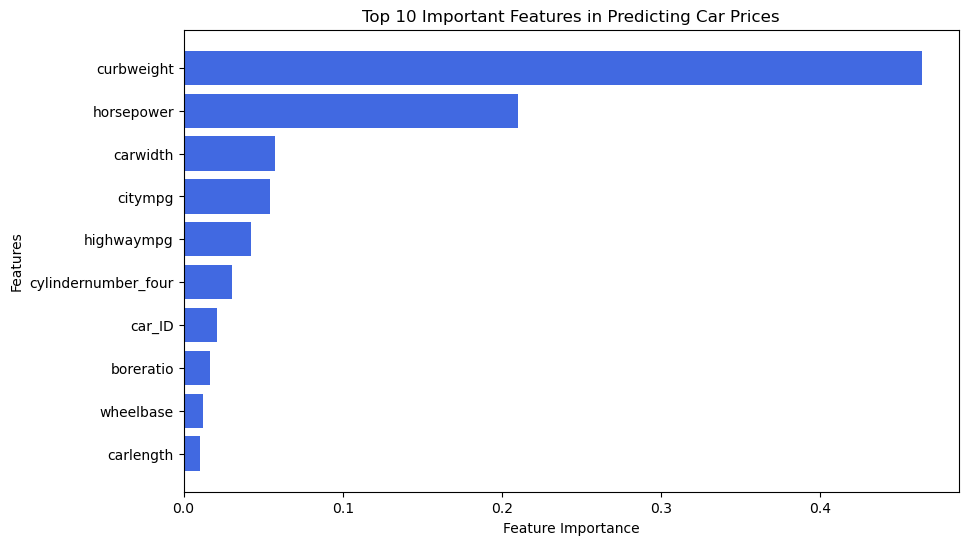

[('curbweight', 0.46388524365983935),
 ('horsepower', 0.21007119931423385),
 ('carwidth', 0.05731672707008461),
 ('citympg', 0.05407912892093768),
 ('highwaympg', 0.04221426228347965)]

In [46]:
import matplotlib.pyplot as plt
import numpy as np


feature_importances = rf_model.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_importances[:10], color='royalblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Predicting Car Prices")
plt.gca().invert_yaxis()  
plt.show()

list(zip(sorted_features[:5], sorted_importances[:5]))


In [ ]:
#among the all independant features curbweight is considered as the important to calculate a car price.
#gradient boosting regressor is considered as the best fitting model here because of high r2 and low mean sqaured error and mean absolute error. all independant features curbweight is considered as the important to calculate a car price.
